#Chess image recognize

## Libraries

In [ ]:
import os
import shutil
import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

##Dataset
https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset?resource=download


In [ ]:
path = kagglehub.dataset_download("niteshfre/chessman-image-dataset")
data_path = os.path.join(path, "Chessman-image-dataset", "Chess")

print("Path to dataset files:", data_path)

Path to dataset files: /root/.cache/kagglehub/datasets/niteshfre/chessman-image-dataset/versions/1/Chessman-image-dataset/Chess


## Data split train test

## Parameters

In [ ]:
img_height, img_width = 150, 150 # Dimensiones de las imágenes
batch_size = 32
epochs = 20
learning_rate = 0.001

## Data generator, trainning and validation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # División entre entrenamiento y validación
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


## Model

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

#for layer in base_model.layers[:15]: # Capas de neuronas dormidas
for layer in base_model.layers:

    layer.trainable = False


model = Sequential([
    base_model,
    Flatten(),
    # Funciones de activación
    #LeakyReLU(alpha=0.1),
    #Dense(256, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')

])

## Model Compile

In [ ]:
# Compilación del modelo
#Optimizadores diferentes
#optimizer=SGD(learning_rate=0.01, momentum=0.9),
#model.compile(optimizer=Adam(learning_rate=learning_rate),
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Trainning

In [ ]:
# Entrenamiento
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3294 - loss: 6.0277 - val_accuracy: 0.6789 - val_loss: 3.1099
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - accuracy: 0.6411 - loss: 3.0525 - val_accuracy: 0.7523 - val_loss: 2.2078
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - accuracy: 0.7389 - loss: 2.2652 - val_accuracy: 0.8165 - val_loss: 1.8120
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 0.7802 - loss: 1.8240 - val_accuracy: 0.8257 - val_loss: 1.5251
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 328ms/step - accuracy: 0.8498 - loss: 1.5134 - val_accuracy: 0.8349 - val_loss: 1.3287
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.8415 - loss: 1.3208 - val_accuracy: 0.8807 - val_loss: 1.1790
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 327ms/step - accuracy: 0.8875 - loss: 1.1189 - val_accuracy: 0.8165 - val_loss: 1.1730
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - accuracy: 0.8641 - loss: 1.0870 - val_accuracy: 0.8532 - val_l

## save model

In [ ]:
#model.save("chess_piece_classifier.h5")
#print("Modelo guardado como chess_piece_classifier.h5")

## Accuracy to train data, test y validation

# Graphs

## Loss graphs

In [ ]:
model.summary()
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,321,236 (100.41 MB)

 Trainable params: 2,098,950 (8.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 4,197,902 (16.01 MB)

## Web errors

In [ ]:
def plot_acc(history, title="Model Accuracy"):
  """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
def plot_loss(history, title="Model Loss"):
  """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

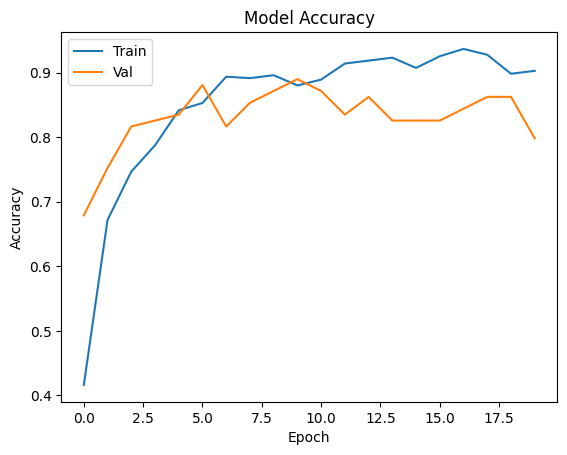

In [ ]:
plot_acc(history)

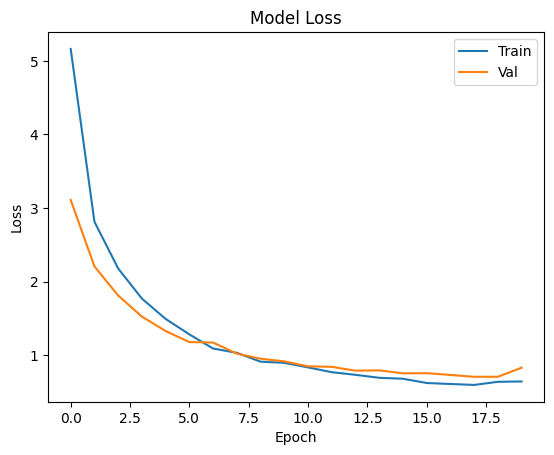

In [ ]:
plot_loss(history)

## Prediction

In [ ]:
# Generate predictions
validation_generator.reset()
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


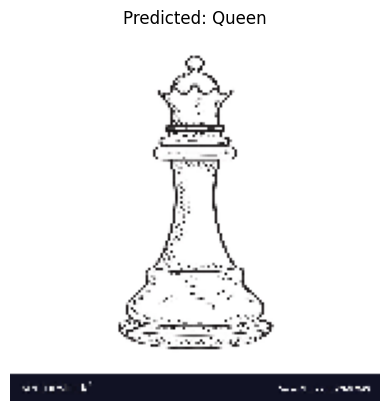

In [ ]:
# Example prediction
sample_image, _ = next(validation_generator)
predicted_class = np.argmax(model.predict(sample_image[0:1]))
plt.imshow(sample_image[0])
plt.title(f"Predicted: {list(train_generator.class_indices.keys())[predicted_class]}")
plt.axis('off')
plt.show()

## Utiliza técnicas de regularización, L1, L2 y o Dropout, así como de inicialización de parámetros. Explica cómo afecta al entrenamiento.




**L2**

Dense(256, activation='relu', kernel_regularizer=l2(0.01))
- Controla el sobreajuste al mantener los pesos pequeños.
- Promueve un modelo más suave y menos propenso a aprender patrones ruidosos.

**Dropout**

Dropout(0.5)
Durante el entrenamiento, desactiva aleatoriamente el 50% de las neuronas en esta capa.
- Evita que las neuronas dependan excesivamente unas de otras (co-adaptación).
- Mejora la capacidad del modelo para generalizar a nuevos datos.

# Otras funciones de activación

## Activation function relu

Path to dataset files: /root/.cache/kagglehub/datasets/niteshfre/chessman-image-dataset/versions/1/Chessman-image-dataset/Chess
Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.
Testing activation: relu, optimizer: Adam
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 545ms/step - accuracy: 0.3090 - loss: 6.4468 - val_accuracy: 0.6514 - val_loss: 3.2366
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 439ms/step - accuracy: 0.6206 - loss: 3.1336 - val_accuracy: 0.7615 - val_loss: 2.3045
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.7146 - loss: 2.2899 - val_accuracy: 0.8440 - val_loss: 1.8634
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - accuracy: 0.7297 - loss: 1.9249 - val_accuracy: 0.8349 - val_loss: 1.5905
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.8202 - loss: 1.5694 - val_accuracy: 0.8257 - val_loss: 1.4073
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.8387 - loss: 1.3574 - val_accuracy: 0.80

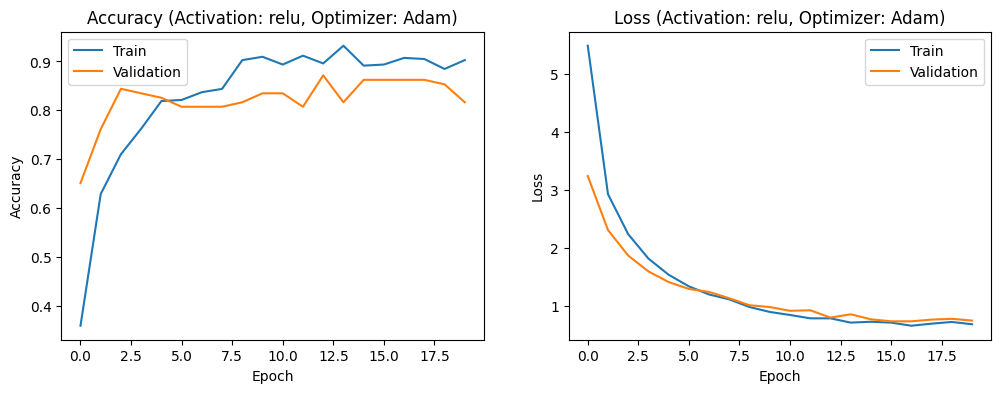

Testing activation: relu, optimizer: SGD
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 482ms/step - accuracy: 0.2038 - loss: 7.4529 - val_accuracy: 0.2018 - val_loss: 6.5426
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.2974 - loss: 6.4882 - val_accuracy: 0.5229 - val_loss: 5.9722
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.3472 - loss: 6.1066 - val_accuracy: 0.7156 - val_loss: 5.6886
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.4466 - loss: 5.8055 - val_accuracy: 0.6514 - val_loss: 5.3275
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 338ms/step - accuracy: 0.4223 - loss: 5.5463 - val_accuracy: 0.6330 - val_loss: 5.2220
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.3689 - loss: 5.3618 - val_accuracy: 0.5963 - val_loss: 4.8642
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - accuracy: 0.3934 - loss: 5.1566 - val_accuracy: 0.6239 - val_loss: 4.6812
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accura

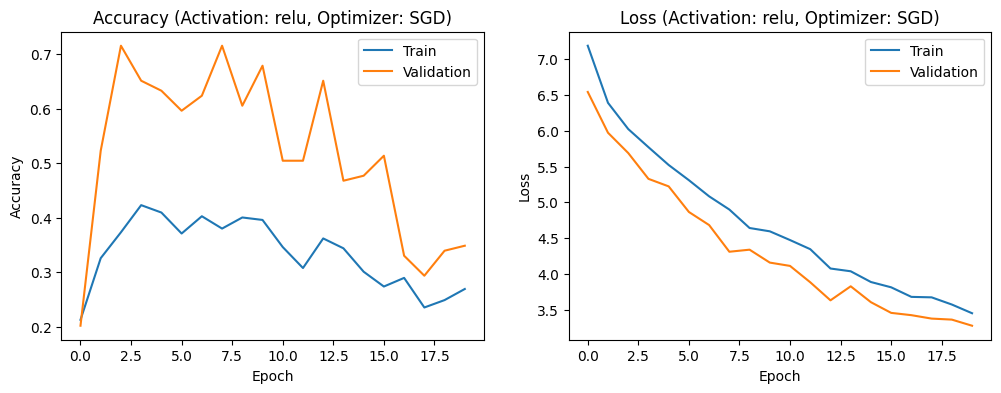

Testing activation: relu, optimizer: RMSprop
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 480ms/step - accuracy: 0.2611 - loss: 8.0916 - val_accuracy: 0.5963 - val_loss: 3.2878
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 353ms/step - accuracy: 0.5307 - loss: 3.1676 - val_accuracy: 0.5963 - val_loss: 2.4013
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.6374 - loss: 2.2610 - val_accuracy: 0.7798 - val_loss: 1.6434
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.6836 - loss: 1.6995 - val_accuracy: 0.7339 - val_loss: 1.5047
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.7436 - loss: 1.3930 - val_accuracy: 0.7890 - val_loss: 1.1846
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.7175 - loss: 1.3013 - val_accuracy: 0.7523 - val_loss: 1.3038
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.7565 - loss: 1.1909 - val_accuracy: 0.8165 - val_loss: 1.0083
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - acc

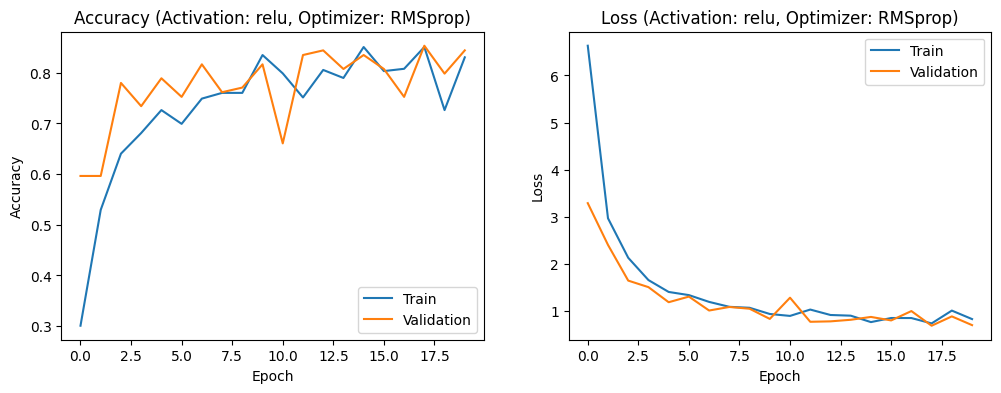

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step


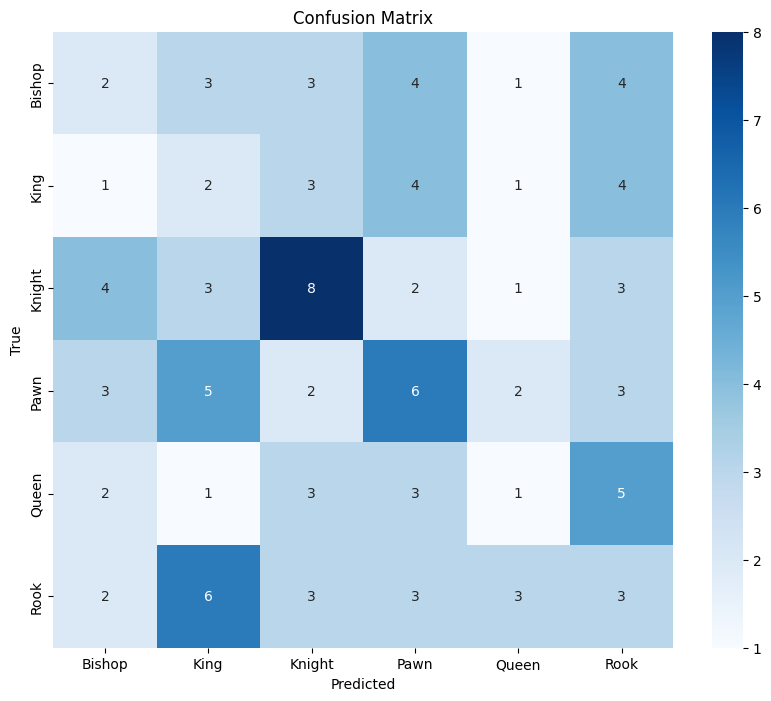

              precision    recall  f1-score   support

      Bishop       0.14      0.12      0.13        17
        King       0.10      0.13      0.11        15
      Knight       0.36      0.38      0.37        21
        Pawn       0.27      0.29      0.28        21
       Queen       0.11      0.07      0.08        15
        Rook       0.14      0.15      0.14        20

    accuracy                           0.20       109
   macro avg       0.19      0.19      0.19       109
weighted avg       0.20      0.20      0.20       109

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


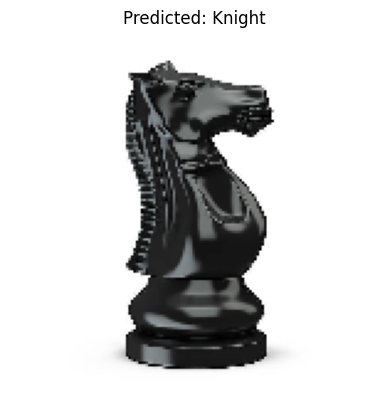

In [ ]:
import os
import shutil
import glob
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l2
import kagglehub
import matplotlib.pyplot as plt
import numpy as np

# Descarga y carga del dataset
path = kagglehub.dataset_download("niteshfre/chessman-image-dataset")
data_path = os.path.join(path, "Chessman-image-dataset", "Chess")
print("Path to dataset files:", data_path)

# Parámetros
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Preparación de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Función para crear un nuevo modelo
def create_model(activation, optimizer):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation=activation, kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Funciones de activación y optimizadores
#activation_functions = ['relu', 'tanh', 'sigmoid']
activation_functions = ['relu']
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': RMSprop(learning_rate=0.001)
}

# Pruebas con diferentes configuraciones
for activation in activation_functions:
    for opt_name, optimizer in optimizers.items():
        print(f"Testing activation: {activation}, optimizer: {opt_name}")

        # Crear un nuevo modelo
        model = create_model(activation, optimizer)

        # Entrenamiento del modelo
        history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=epochs
        )

        # Evaluación del modelo
        val_loss, val_acc = model.evaluate(validation_generator)
        print(f"Final Validation Accuracy with {activation}, {opt_name}: {val_acc:.4f}")

        # Graficar resultados
        def plot_metrics(history, title_suffix=""):
            """Grafica accuracy y pérdida por épocas"""
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Train')
            plt.plot(history.history['val_accuracy'], label='Validation')
            plt.title(f'Accuracy {title_suffix}')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Train')
            plt.plot(history.history['val_loss'], label='Validation')
            plt.title(f'Loss {title_suffix}')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()

            plt.show()

        plot_metrics(history, f"(Activation: {activation}, Optimizer: {opt_name})")

# Evaluación por clase
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Reporte de clasificación
report = classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys())
print(report)

# Example prediction
sample_image, _ = next(validation_generator)
predicted_class = np.argmax(model.predict(sample_image[0:1]))
plt.imshow(sample_image[0])
plt.title(f"Predicted: {list(train_generator.class_indices.keys())[predicted_class]}")
plt.axis('off')
plt.show()

## Activation function tanh

Path to dataset files: /root/.cache/kagglehub/datasets/niteshfre/chessman-image-dataset/versions/1/Chessman-image-dataset/Chess
Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.
Testing activation: tanh, optimizer: Adam
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 592ms/step - accuracy: 0.2369 - loss: 7.0268 - val_accuracy: 0.7156 - val_loss: 3.7194
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 260ms/step - accuracy: 0.5340 - loss: 3.7837 - val_accuracy: 0.7615 - val_loss: 2.7059
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.6756 - loss: 2.8275 - val_accuracy: 0.8073 - val_loss: 2.1313
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 351ms/step - accuracy: 0.7349 - loss: 2.2578 - val_accuracy: 0.8073 - val_loss: 1.7940
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.8215 - loss: 1.8005 - val_accuracy: 0.7890 - val_loss: 1.5799
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 0.8257 - loss: 1.6198 - val_accuracy: 0.8624 - val_loss: 1.4251
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.8275 - loss: 1.4147 - val_accuracy: 0.8257 - val_loss: 1.3575
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - accuracy: 0.8712 - loss: 1.2476 - val_accuracy: 0.8440 - va

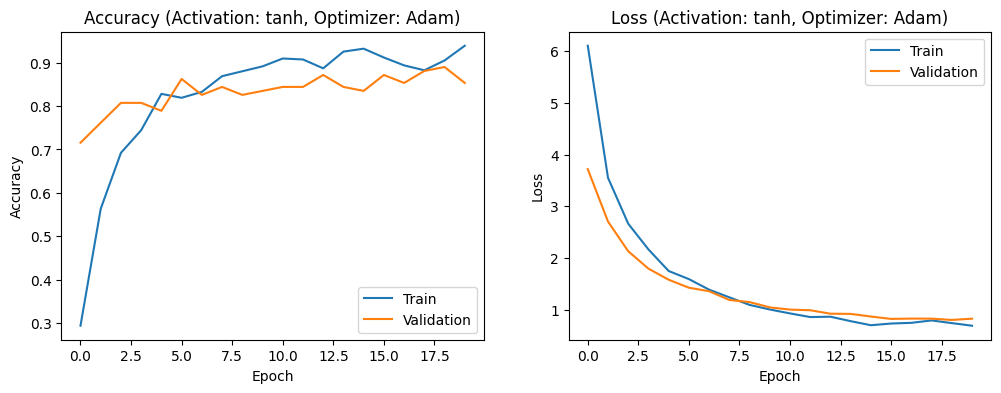

Testing activation: tanh, optimizer: SGD
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 700ms/step - accuracy: 0.2059 - loss: 8.0227 - val_accuracy: 0.1927 - val_loss: 6.9642
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 291ms/step - accuracy: 0.2361 - loss: 7.2574 - val_accuracy: 0.4404 - val_loss: 6.2403
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - accuracy: 0.2704 - loss: 6.6982 - val_accuracy: 0.5872 - val_loss: 5.8467
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - accuracy: 0.3644 - loss: 6.1342 - val_accuracy: 0.5872 - val_loss: 5.4466
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.3958 - loss: 5.7329 - val_accuracy: 0.6330 - val_loss: 5.1052
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 332ms/step - accuracy: 0.4649 - loss: 5.4880 - val_accuracy: 0.5688 - val_loss: 5.0897
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.4026 - loss: 5.4059 - val_accuracy: 0.4679 - val_loss: 4.8738
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - accur

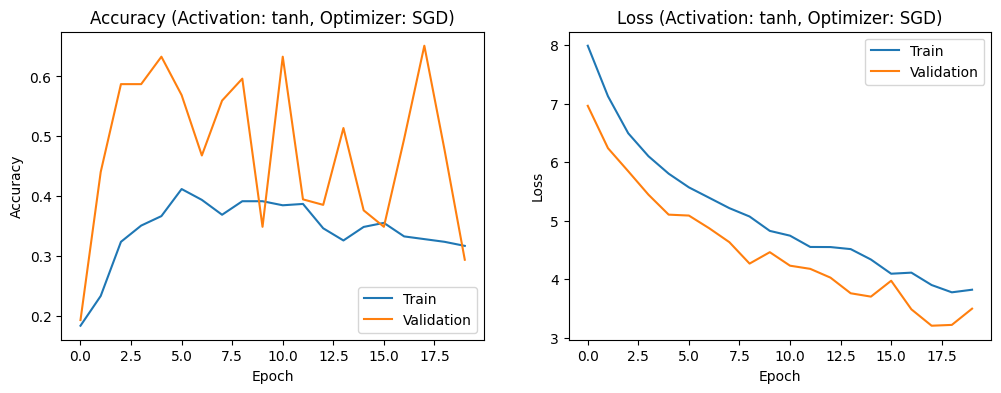

Testing activation: tanh, optimizer: RMSprop
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 529ms/step - accuracy: 0.2496 - loss: 7.4619 - val_accuracy: 0.5413 - val_loss: 3.6715
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 289ms/step - accuracy: 0.3876 - loss: 3.9234 - val_accuracy: 0.6697 - val_loss: 2.3437
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 318ms/step - accuracy: 0.5000 - loss: 2.8419 - val_accuracy: 0.6422 - val_loss: 2.0430
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 268ms/step - accuracy: 0.5957 - loss: 2.2617 - val_accuracy: 0.6972 - val_loss: 1.9033
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.6322 - loss: 1.9742 - val_accuracy: 0.6239 - val_loss: 1.6474
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.6063 - loss: 1.9557 - val_accuracy: 0.6972 - val_loss: 1.7156
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step - accuracy: 0.7241 - loss: 1.6509 - val_accuracy: 0.6055 - val_loss: 1.8215
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 307ms/step - ac

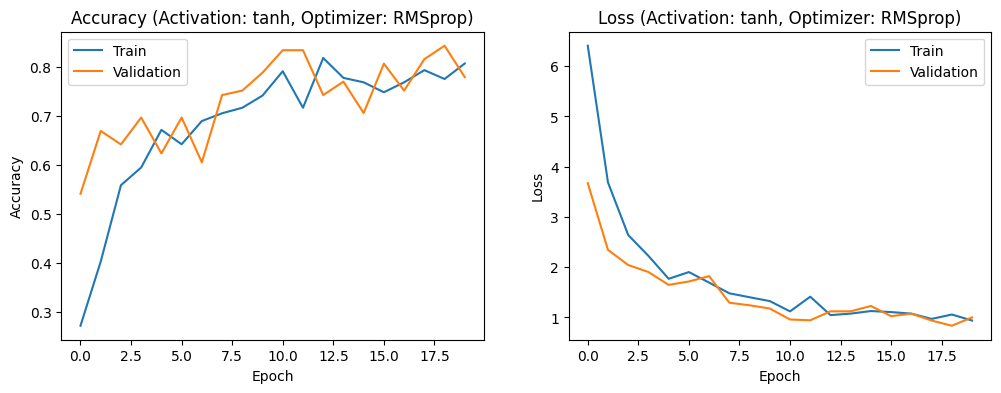

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step


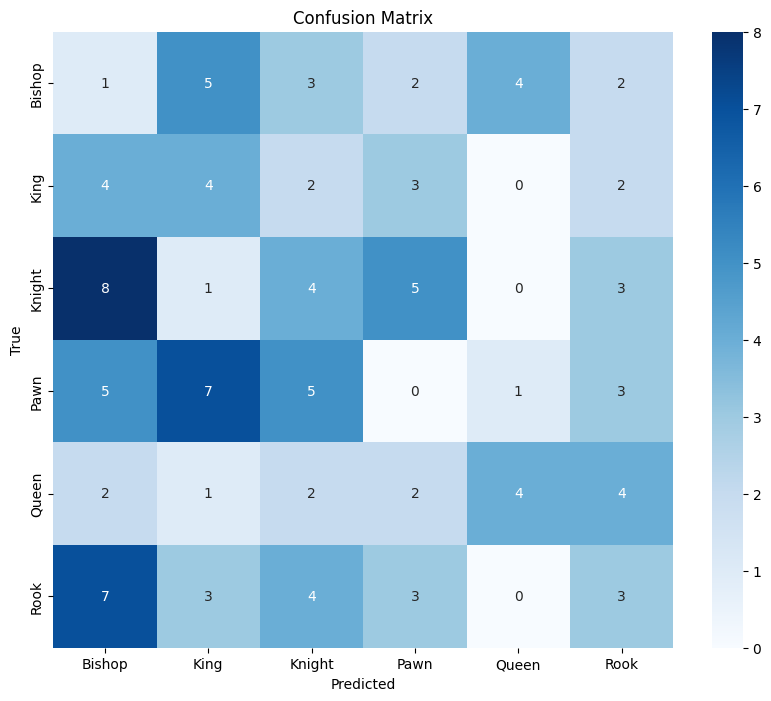

              precision    recall  f1-score   support

      Bishop       0.04      0.06      0.05        17
        King       0.19      0.27      0.22        15
      Knight       0.20      0.19      0.20        21
        Pawn       0.00      0.00      0.00        21
       Queen       0.44      0.27      0.33        15
        Rook       0.18      0.15      0.16        20

    accuracy                           0.15       109
   macro avg       0.17      0.16      0.16       109
weighted avg       0.16      0.15      0.15       109



In [ ]:
import os
import shutil
import glob
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l2
import kagglehub
import matplotlib.pyplot as plt
import numpy as np

# Descarga y carga del dataset
path = kagglehub.dataset_download("niteshfre/chessman-image-dataset")
data_path = os.path.join(path, "Chessman-image-dataset", "Chess")
print("Path to dataset files:", data_path)

# Parámetros
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Preparación de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Función para crear un nuevo modelo
def create_model(activation, optimizer):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation=activation, kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Funciones de activación y optimizadores
#activation_functions = ['relu', 'tanh', 'sigmoid']
activation_functions = ['tanh']
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': RMSprop(learning_rate=0.001)
}

# Pruebas con diferentes configuraciones
for activation in activation_functions:
    for opt_name, optimizer in optimizers.items():
        print(f"Testing activation: {activation}, optimizer: {opt_name}")

        # Crear un nuevo modelo
        model = create_model(activation, optimizer)

        # Entrenamiento del modelo
        history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=epochs
        )

        # Evaluación del modelo
        val_loss, val_acc = model.evaluate(validation_generator)
        print(f"Final Validation Accuracy with {activation}, {opt_name}: {val_acc:.4f}")

        # Graficar resultados
        def plot_metrics(history, title_suffix=""):
            """Grafica accuracy y pérdida por épocas"""
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Train')
            plt.plot(history.history['val_accuracy'], label='Validation')
            plt.title(f'Accuracy {title_suffix}')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Train')
            plt.plot(history.history['val_loss'], label='Validation')
            plt.title(f'Loss {title_suffix}')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()

            plt.show()

        plot_metrics(history, f"(Activation: {activation}, Optimizer: {opt_name})")

# Evaluación por clase
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Reporte de clasificación
report = classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys())
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


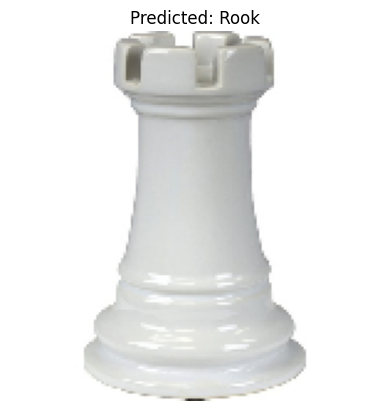

In [ ]:
# Example prediction
sample_image, _ = next(validation_generator)
predicted_class = np.argmax(model.predict(sample_image[0:1]))
plt.imshow(sample_image[0])
plt.title(f"Predicted: {list(train_generator.class_indices.keys())[predicted_class]}")
plt.axis('off')
plt.show()

## Activation function sigmoid

Path to dataset files: /root/.cache/kagglehub/datasets/niteshfre/chessman-image-dataset/versions/1/Chessman-image-dataset/Chess
Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.
Testing activation: sigmoid, optimizer: Adam
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 618ms/step - accuracy: 0.2511 - loss: 6.2047 - val_accuracy: 0.6422 - val_loss: 3.2696
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - accuracy: 0.5885 - loss: 3.0359 - val_accuracy: 0.7523 - val_loss: 2.0086
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - accuracy: 0.7472 - loss: 1.9527 - val_accuracy: 0.7798 - val_loss: 1.5110
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.8044 - loss: 1.5096 - val_accuracy: 0.7982 - val_loss: 1.2640
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.7861 - loss: 1.3114 - val_accuracy: 0.8440 - val_loss: 1.1069
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.8085 - loss: 1.1493 - val_accuracy: 0.7523 - val_loss: 1.1602
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.8061 - loss: 1.1026 - val_accuracy: 0.8257 - val_loss: 1.0415
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - accuracy: 0.8286 - loss: 1.0387 - val_accuracy: 0.8073 - v

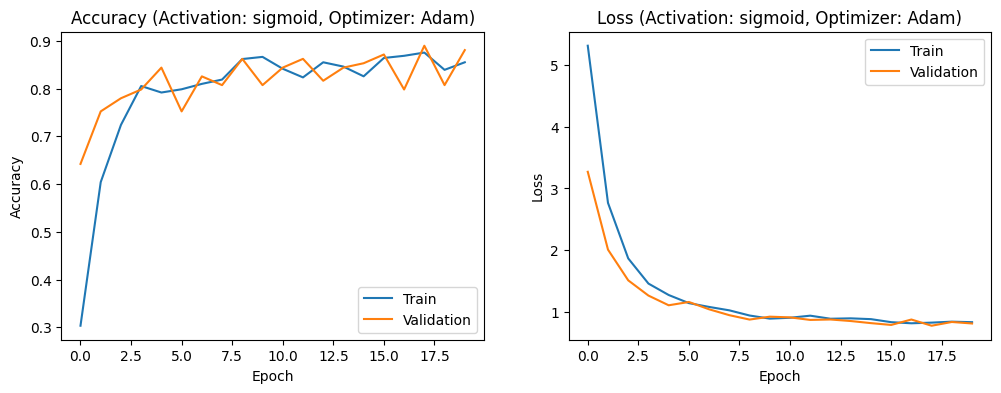

Testing activation: sigmoid, optimizer: SGD
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 493ms/step - accuracy: 0.1929 - loss: 7.1214 - val_accuracy: 0.3394 - val_loss: 6.5015
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - accuracy: 0.3400 - loss: 6.4382 - val_accuracy: 0.6422 - val_loss: 5.9580
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - accuracy: 0.4572 - loss: 5.9927 - val_accuracy: 0.6055 - val_loss: 5.5363
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.5023 - loss: 5.5874 - val_accuracy: 0.6422 - val_loss: 5.1662
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.5868 - loss: 5.2190 - val_accuracy: 0.7064 - val_loss: 4.8133
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.5992 - loss: 4.9394 - val_accuracy: 0.7890 - val_loss: 4.5080
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 513ms/step - accuracy: 0.6405 - loss: 4.6351 - val_accuracy: 0.7431 - val_loss: 4.2982
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - acc

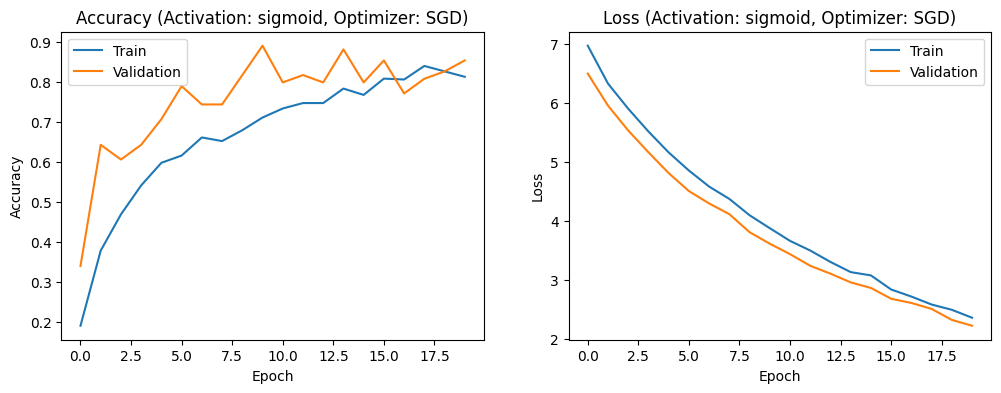

Testing activation: sigmoid, optimizer: RMSprop
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 492ms/step - accuracy: 0.2153 - loss: 6.5454 - val_accuracy: 0.5046 - val_loss: 3.2320
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 250ms/step - accuracy: 0.4827 - loss: 3.0584 - val_accuracy: 0.6697 - val_loss: 2.0270
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - accuracy: 0.6293 - loss: 2.0028 - val_accuracy: 0.6514 - val_loss: 1.6100
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 282ms/step - accuracy: 0.6186 - loss: 1.7869 - val_accuracy: 0.7156 - val_loss: 1.3457
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.7102 - loss: 1.4023 - val_accuracy: 0.6789 - val_loss: 1.2816
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.7523 - loss: 1.3047 - val_accuracy: 0.7523 - val_loss: 1.1790
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - accuracy: 0.7191 - loss: 1.2884 - val_accuracy: 0.7523 - val_loss: 1.2093
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 376ms/step - 

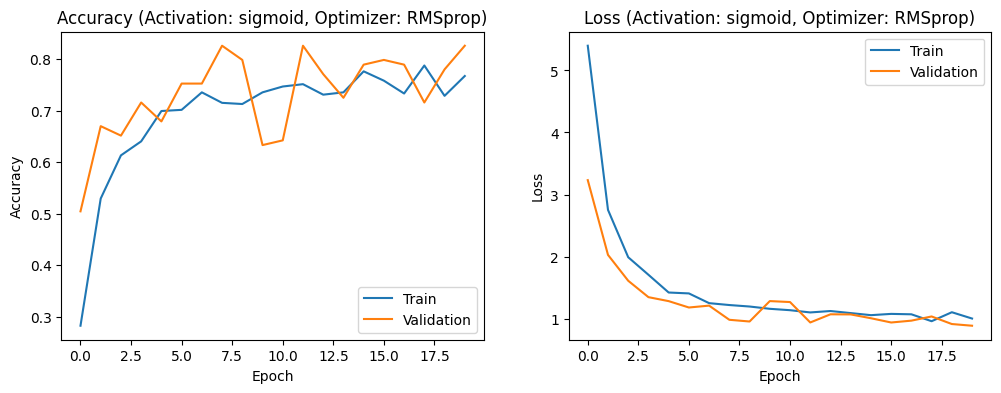

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step


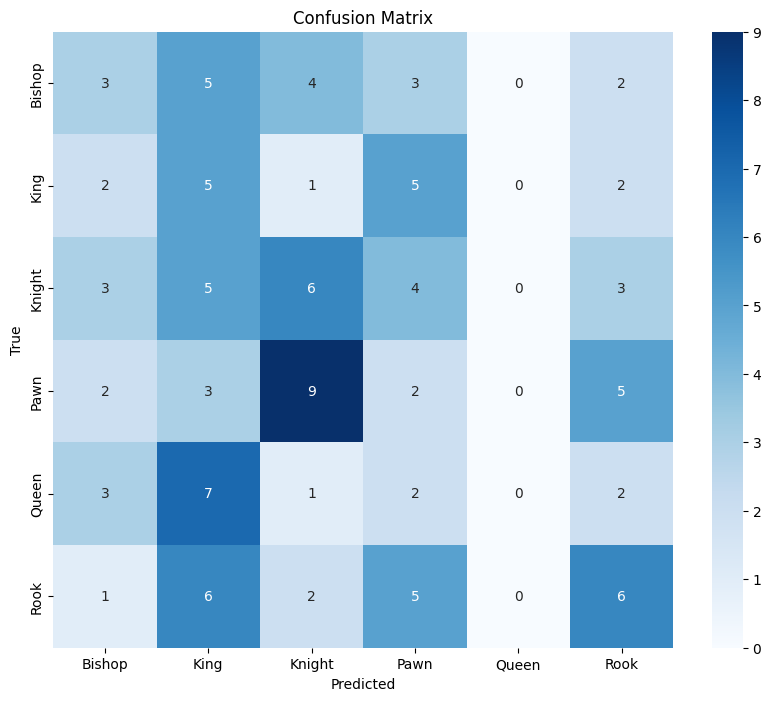

              precision    recall  f1-score   support

      Bishop       0.21      0.18      0.19        17
        King       0.16      0.33      0.22        15
      Knight       0.26      0.29      0.27        21
        Pawn       0.10      0.10      0.10        21
       Queen       0.00      0.00      0.00        15
        Rook       0.30      0.30      0.30        20

    accuracy                           0.20       109
   macro avg       0.17      0.20      0.18       109
weighted avg       0.18      0.20      0.19       109



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os
import shutil
import glob
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l2
import kagglehub
import matplotlib.pyplot as plt
import numpy as np

# Descarga y carga del dataset
path = kagglehub.dataset_download("niteshfre/chessman-image-dataset")
data_path = os.path.join(path, "Chessman-image-dataset", "Chess")
print("Path to dataset files:", data_path)

# Parámetros
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Preparación de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Función para crear un nuevo modelo
def create_model(activation, optimizer):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation=activation, kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Funciones de activación y optimizadores
#activation_functions = ['relu', 'tanh', 'sigmoid']
activation_functions = ['sigmoid']
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': RMSprop(learning_rate=0.001)
}

# Pruebas con diferentes configuraciones
for activation in activation_functions:
    for opt_name, optimizer in optimizers.items():
        print(f"Testing activation: {activation}, optimizer: {opt_name}")

        # Crear un nuevo modelo
        model = create_model(activation, optimizer)

        # Entrenamiento del modelo
        history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=epochs
        )

        # Evaluación del modelo
        val_loss, val_acc = model.evaluate(validation_generator)
        print(f"Final Validation Accuracy with {activation}, {opt_name}: {val_acc:.4f}")

        # Graficar resultados
        def plot_metrics(history, title_suffix=""):
            """Grafica accuracy y pérdida por épocas"""
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Train')
            plt.plot(history.history['val_accuracy'], label='Validation')
            plt.title(f'Accuracy {title_suffix}')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Train')
            plt.plot(history.history['val_loss'], label='Validation')
            plt.title(f'Loss {title_suffix}')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()

            plt.show()

        plot_metrics(history, f"(Activation: {activation}, Optimizer: {opt_name})")

# Evaluación por clase
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Reporte de clasificación
report = classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys())
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


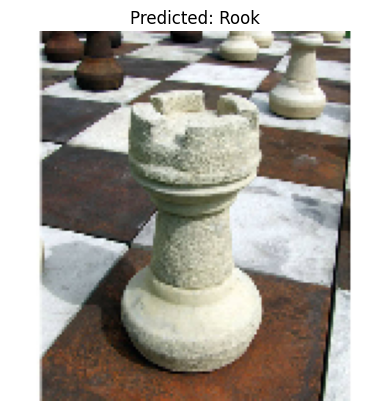

In [ ]:
# Example prediction
sample_image, _ = next(validation_generator)
predicted_class = np.argmax(model.predict(sample_image[0:1]))
plt.imshow(sample_image[0])
plt.title(f"Predicted: {list(train_generator.class_indices.keys())[predicted_class]}")
plt.axis('off')
plt.show()